In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.rename(columns={'#Passengers':'Passengers'},inplace = True)

<AxesSubplot:>

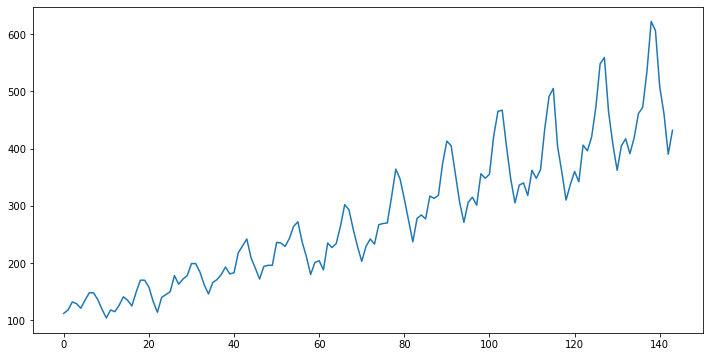

In [4]:
plt.rcParams.update({'figure.figsize':(12,6)})
df['Passengers'].plot()

### Moving Averages
1. Simple Moving Average (SMA)
2. Cumulative Moving Average (CMA)
3. Exponential Moving Average (EMA) / Exponential Weighted Moving Average (EWMA)

### SMA/ Rolling Mean
$$ SMA_t = \frac{ x_t + x_{t-1} + x_{t-2} + ... + x_{t-n}}{n} $$

In [5]:
df['SMA_30']=df['Passengers'].rolling(window = 30).mean()

<AxesSubplot:>

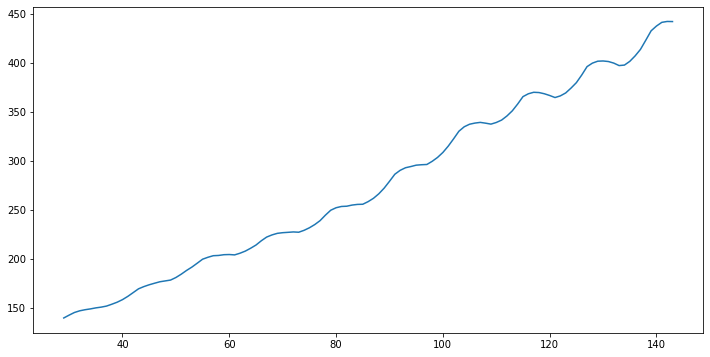

In [6]:
df['SMA_30'].dropna().plot()

<AxesSubplot:>

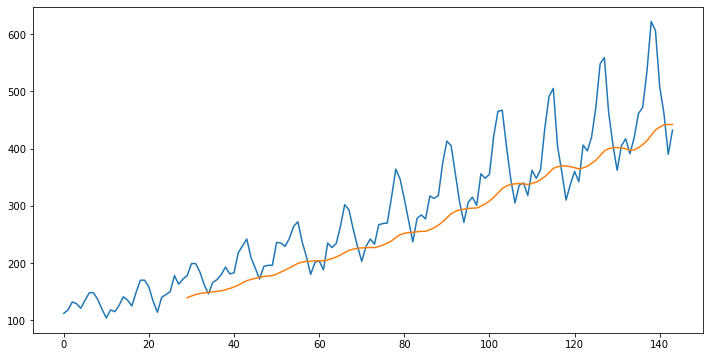

In [7]:
df['Passengers'].plot()
df['SMA_30'].dropna().plot()

#### Conclusion: Passenger column has uptrend/increasing trend(Pattern)

### CMA
$$ CMA_t = \frac{x_1 + x_2 + ... + x_n}{n} $$

In [8]:
df['CMA']=df['Passengers'].expanding().mean()

In [9]:
df

,Month,Passengers,SMA_30,CMA
0,1949-01,112,NaN,112.000000
1,1949-02,118,NaN,115.000000
2,1949-03,132,NaN,120.666667
3,1949-04,129,NaN,122.750000
4,1949-05,121,NaN,122.400000
...,...,...,...,...
139,1960-08,606,432.566667,275.514286
140,1960-09,508,437.433333,277.163121
141,1960-10,461,441.200000,278.457746
142,1960-11,390,442.100000,279.237762


<AxesSubplot:>

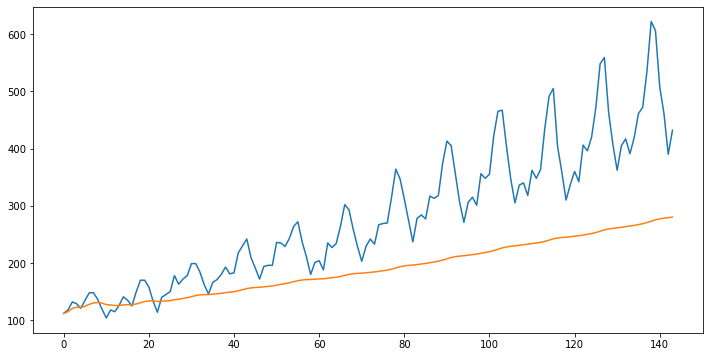

In [10]:
df['Passengers'].plot()
df['CMA'].plot()

### EMA / EWMA
$$ EMA_t = \alpha * x_t + (1 - \alpha) * EMA_{t-1} $$
##### alpha is smoothing factor
##### Range of alpha is between 0 to 1

In [11]:
# df['EMA']=df['Passengers'].ewm(span=4, adjust=False).mean()
df['EMA_0.1']=df['Passengers'].ewm(alpha = 0.1).mean()
df['EMA_0.3']=df['Passengers'].ewm(alpha = 0.3).mean()

<AxesSubplot:>

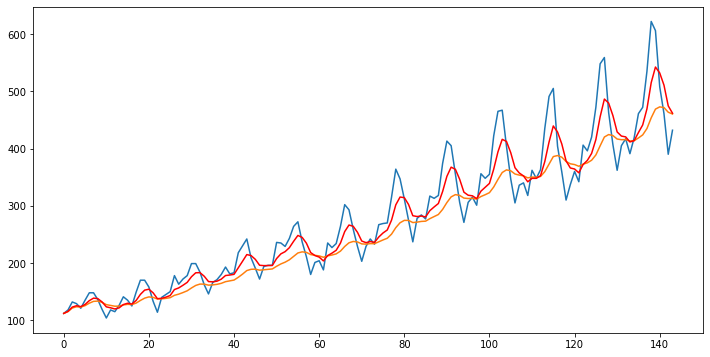

In [12]:
df['Passengers'].plot()
df['EMA_0.1'].plot()
df['EMA_0.3'].plot(color='r')